<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [6]:
# Imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [17]:
path = 'G:/Data/Lambda/Data_Science_Course/Unit4/Data/Amazon.csv'
df = pd.read_csv(path)

In [29]:
#df columns (for access in the rest of the document)
dfc = df.columns.to_list()

# Functions

In [31]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

tokenizer = Tokenizer(nlp.vocab)

In [41]:
def tokenize(text):
    return tokenizer(text)

In [46]:
a = df['reviews.text'].apply(tokenize)
a.head()

0    (I, order, 3, of, them, and, one, of, the, ite...
1    (Bulk, is, always, the, less, expensive, way, ...
2    (Well, they, are, not, Duracell, but, for, the...
3    (Seem, to, work, as, well, as, name, brand, ba...
4    (These, batteries, are, very, long, lasting, t...
Name: reviews.text, dtype: object

In [47]:
# the tokens produced are in spacy format, 
type(a[0])

spacy.tokens.doc.Doc

In [93]:
# to get text from spacy objects:
# in list format
print(a[0].text)
type(a[0].text)

I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.


str

In [101]:
dir(a[0])

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_byte

In [112]:
a[0].vocab

In [135]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [144]:
def set_1(in_val):
    return 1

In [150]:
df['tokenized_reviews'] = df['reviews.text'].apply(tokenize,1)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokenized_reviews,tokenized_strings
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, item, bad, quality, missing, backup, s...",1
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]",1
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]",1
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]",1
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]",1


In [152]:
df['tokenized_reviews'][0]

['order',
 'item',
 'bad',
 'quality',
 'missing',
 'backup',
 'spring',
 'pcs',
 'aluminum',
 'battery',
 'work']

In [147]:
df['tokenized_reviews'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [125]:
df['reviews.text'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

# Class Follow Along

In [111]:
simple_preprocess('this is a test, the one we will return to')

['this', 'is', 'test', 'the', 'one', 'we', 'will', 'return', 'to']

In [227]:
id2word = corpora.Dictionary(df['tokenized_reviews'])

## some id2word tests property tests

In [165]:
id2word.token2id['good']

35

In [166]:
id2word[35]

'good'

In [172]:
len(id2word)

9622

In [173]:
len(id2word.keys())

9622

In [175]:
# Not sure what this does
import sys
sys.getsizeof(id2word)

56

## back

In [228]:
# Statistical trimming of set:
id2word.filter_extremes(no_below=4,no_above=.97)

Note that the function `filter_extremes` doesn't keep track of the original dictionary. Once it has culled keys, you have to reinitialize the dictionary to be able to trim differently. 
It would probably be best to use a copy if the dictionary step
is memory intensive. Also start wide, and then narrow, instead of the other way around.

In [229]:
# More details on the above function if needed:
# help(id2word.filter_extremes)

In [231]:
len(id2word.keys())

4126

In [233]:
# Now turn this into a bag of words representation
# for input to lda

corpus = [id2word.doc2bow(text) for text in df['tokenized_reviews']]

In [245]:
# An example value of corpus
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [237]:
# This is the text of that corpus:
df['tokenized_reviews'][0]

['order',
 'item',
 'bad',
 'quality',
 'missing',
 'backup',
 'spring',
 'pcs',
 'aluminum',
 'battery',
 'work']

In [246]:
# And here is the id of those words:
id2word.token2id['order']

# notice that (6,1) is one of the values in the corpus

6

In [277]:
# the number of topics the model is run on 
man_num_topics = 5
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=42,
                   num_topics=man_num_topics,
                   passes=10,
                   workers=5
                  )

In [249]:
lda.print_topics()

[(0,
  '0.051*"tablet" + 0.019*"use" + 0.018*"old" + 0.016*"easy" + 0.016*"great" + 0.016*"apps" + 0.015*"games" + 0.015*"loves" + 0.015*"year" + 0.015*"kids"'),
 (1,
  '0.042*"kindle" + 0.015*"like" + 0.013*"screen" + 0.011*"use" + 0.011*"read" + 0.010*"new" + 0.010*"light" + 0.010*"reading" + 0.009*"love" + 0.009*"battery"'),
 (2,
  '0.086*"batteries" + 0.023*"amazon" + 0.023*"long" + 0.016*"brand" + 0.016*"work" + 0.014*"battery" + 0.011*"time" + 0.011*"use" + 0.011*"buy" + 0.010*"like"'),
 (3,
  '0.058*"great" + 0.034*"love" + 0.030*"gift" + 0.026*"use" + 0.025*"bought" + 0.023*"tablet" + 0.021*"easy" + 0.020*"kids" + 0.019*"christmas" + 0.014*"loves"'),
 (4,
  '0.123*"great" + 0.103*"price" + 0.101*"good" + 0.038*"product" + 0.033*"batteries" + 0.026*"works" + 0.022*"value" + 0.019*"quality" + 0.018*"work" + 0.017*"deal"')]

In [252]:
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]

In [254]:
topics = [' '.join(t[0:5]) for t in words]

In [256]:
for id, t in enumerate(topics):
    print(f'--------- Topic {id} ----------')
    print(t,end='\n\n')

--------- Topic 0 ----------
tablet use old easy great

--------- Topic 1 ----------
kindle like screen use read

--------- Topic 2 ----------
batteries amazon long brand work

--------- Topic 3 ----------
great love gift use bought

--------- Topic 4 ----------
great price good product batteries



In [258]:
# The model has been trained now we can take any text
# and have the model return to us the amount of each topic
# the text contains:
lda[corpus[0]] 

[(0, 0.016769547),
 (1, 0.18498193),
 (2, 0.51178306),
 (3, 0.26942956),
 (4, 0.017035903)]

In [259]:
distro = [lda[d] for d in corpus]

In [261]:
distro[0]

[(0, 0.01676955),
 (1, 0.18496795),
 (2, 0.5117886),
 (3, 0.269438),
 (4, 0.017035896)]

In [278]:

def update(doc):
    d_dist = {k:0 for k in range(0,man_num_topics)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist
new_distro = [update(d) for d in distro]

In [281]:
len(new_distro)

28332

In [282]:
len(df['reviews.text'])

28332

In [285]:
lda_df = pd.DataFrame.from_records(new_distro)

In [286]:
lda_df.columns = topics

In [289]:
lda_df.head()

,tablet use old easy great,kindle like screen use read,batteries amazon long brand work,great love gift use bought,great price good product batteries
0,0.016770,0.184968,0.511789,0.269438,0.017036
1,0.033634,0.033942,0.865130,0.033470,0.033824
2,0.050254,0.050433,0.276280,0.050205,0.572829
3,0.033433,0.033661,0.503111,0.033483,0.396312
4,0.033375,0.033391,0.035026,0.033589,0.864619


In [291]:
import seaborn as sns
sns.barplot(lda_df[0])

KeyError: 0

In [306]:
viz_df = df[['name','reviews.rating']]
viz_df.columns=['name','ratings']

In [314]:
viz_df = viz_df.merge(lda_df,left_index=True,right_index=True)

In [316]:
viz_df.head()

,name,ratings,tablet use old easy great,kindle like screen use read,batteries amazon long brand work,great love gift use bought,great price good product batteries
0,AmazonBasics AAA Performance Alkaline Batterie...,3,0.016770,0.184968,0.511789,0.269438,0.017036
1,AmazonBasics AAA Performance Alkaline Batterie...,4,0.033634,0.033942,0.865130,0.033470,0.033824
2,AmazonBasics AAA Performance Alkaline Batterie...,5,0.050254,0.050433,0.276280,0.050205,0.572829
3,AmazonBasics AAA Performance Alkaline Batterie...,5,0.033433,0.033661,0.503111,0.033483,0.396312
4,AmazonBasics AAA Performance Alkaline Batterie...,5,0.033375,0.033391,0.035026,0.033589,0.864619


In [322]:
a = viz_df.groupby('ratings').mean()
a

,tablet use old easy great,kindle like screen use read,batteries amazon long brand work,great love gift use bought,great price good product batteries
ratings,,,,,
1,0.107835,0.162836,0.608262,0.057734,0.057921
2,0.184035,0.169201,0.500614,0.071726,0.068212
3,0.294025,0.166449,0.316650,0.103774,0.115864
4,0.358276,0.152764,0.143676,0.156910,0.185377
5,0.262926,0.127455,0.193094,0.156166,0.258326


In [324]:
viz_df.groupby('ratings').mean().T

ratings,1,2,3,4,5
tablet use old easy great,0.107835,0.184035,0.294025,0.358276,0.262926
kindle like screen use read,0.162836,0.169201,0.166449,0.152764,0.127455
batteries amazon long brand work,0.608262,0.500614,0.316650,0.143676,0.193094
great love gift use bought,0.057734,0.071726,0.103774,0.156910,0.156166
great price good product batteries,0.057921,0.068212,0.115864,0.185377,0.258326


In [326]:
a.iloc[0]

tablet use old easy great             0.107835
kindle like screen use read           0.162836
batteries amazon long brand work      0.608262
great love gift use bought            0.057734
great price good product batteries    0.057921
Name: 1, dtype: float64

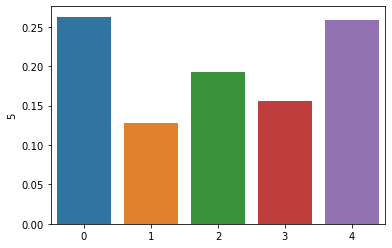

In [335]:
import seaborn as sns

sns.barplot(list(range(5)),a.iloc[4])

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling